**Importing Libraries**

In [1]:
import numpy as np
import glob
import os
import cv2
from sklearn.preprocessing import StandardScaler
import time
from sklearn.decomposition import PCA
from sklearn import svm
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
import pickle

**Creating object for Standard Scaler**

In [2]:
scaler = StandardScaler()

**Loading and preprocessing the training dataset**

In [3]:
fruit_training = []
labels_training = []
for fruit_dir_path in glob.glob("fruits-360/Training/*"):
    fruit_label = fruit_dir_path.split("/")[-1]
    for image_path in glob.glob(os.path.join(fruit_dir_path, "*.jpg")):
        image = cv2.imread(image_path, cv2.IMREAD_COLOR)
        image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
        image = cv2.resize(image, (50, 50))
        fruit_training.append(image.flatten())
        labels_training.append(fruit_label)        
fruit_training = np.array(fruit_training)
labels_training = np.array(labels_training)
fruit_training = scaler.fit_transform(fruit_training)
label_to_id_dict = {v: i for i,v in enumerate(np.unique(labels_training))}
id_to_label_dict = {v: k for k, v in label_to_id_dict.items()}
label_ids_training = np.array([label_to_id_dict[x] for x in labels_training])

/usr/local/lib/python3.5/dist-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


**Loading and preprocessing the test dataset**

In [4]:
fruit_test = []
labels_test = []
for fruit_dir_path in glob.glob("fruits-360/Test/*"):
    fruit_label = fruit_dir_path.split("/")[-1]
    for image_path in glob.glob(os.path.join(fruit_dir_path, "*.jpg")):
        image = cv2.imread(image_path, cv2.IMREAD_COLOR)
        image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
        image = cv2.resize(image, (50, 50))
        fruit_test.append(image.flatten())
        labels_test.append(fruit_label)
fruit_test = np.array(fruit_test)
fruit_test = scaler.transform(fruit_test)
labels_test = np.array(labels_test)
label_to_id_dict = {v: i for i,v in enumerate(np.unique(labels_test))}
id_to_label_dict = {v: k for k, v in label_to_id_dict.items()}
label_ids_test = np.array([label_to_id_dict[x] for x in labels_test])

/usr/local/lib/python3.5/dist-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


**PCA**

In [5]:
pca = PCA(0.95)
pca.fit(fruit_training)
pca_fruit_training = pca.transform(fruit_training)
pca_fruit_test = pca.transform(fruit_test)

In [6]:
a = []

<h3>Random Forest Classifier

In [7]:
start_time = time.time()
rfc_classifier = RandomForestClassifier(n_estimators = 100, random_state = 0)
rfc_classifier = rfc_classifier.fit(pca_fruit_training, label_ids_training)
print("--- %s seconds ---" % (time.time() - start_time))

--- 10.148839235305786 seconds ---


    Prediction

In [8]:
y_pred = rfc_classifier.predict(pca_fruit_test)
rfc_precision = accuracy_score(y_pred, label_ids_test) * 100
a.append(rfc_precision)
print("Accuracy with Random Forest Classifier: {0:.6f}%".format(rfc_precision))

Accuracy with Random Forest Classifier: 85.916920%


<h3>SVM Classifier

In [9]:
start_time = time.time()
svm_classifier = svm.SVC(C = 7,
                         kernel = "rbf",
                         gamma = 0.0006,
                         random_state = 0)
svm_classifier = svm_classifier.fit(pca_fruit_training, label_ids_training)
print("--- %s seconds ---" % (time.time() - start_time))

--- 3.9055378437042236 seconds ---


    Prediction

In [10]:
y_pred = svm_classifier.predict(pca_fruit_test)
svm_precision = accuracy_score(y_pred, label_ids_test) * 100
a.append(svm_precision)
print("Accuracy with SVM: {0:.6f}%".format(svm_precision))

Accuracy with SVM: 91.185410%


<h3>Softmax Classifier

In [11]:
start_time = time.time()
sgd_classifier = SGDClassifier(max_iter = 1000,
                               tol = 1e-1,
                               random_state = 0);
sgd_classifier = sgd_classifier.fit(pca_fruit_training, label_ids_training)
print("--- %s seconds ---" % (time.time() - start_time))

--- 0.8543627262115479 seconds ---


    Prediction

In [12]:
y_pred = sgd_classifier.predict(pca_fruit_test)
sgd_precision = accuracy_score(y_pred, label_ids_test) * 100
a.append(sgd_precision)
print("Accuracy with Softmax: {0:.6f}%".format(sgd_precision))

Accuracy with Softmax: 74.738264%


<h3>Naive Bayes Classifier

In [13]:
start_time = time.time()
nbc_classifier = GaussianNB()
nbc_classifier = nbc_classifier.fit(fruit_training, label_ids_training)
print("--- %s seconds ---" % (time.time() - start_time))

--- 0.31200265884399414 seconds ---


    Prediction

In [14]:
y_pred = nbc_classifier.predict(fruit_test)
nbc_precision = accuracy_score(y_pred, label_ids_test) * 100
a.append(nbc_precision)
print("Accuracy with Naive Bayes: {0:.6f}%".format(nbc_precision))

Accuracy with Naive Bayes: 70.989531%


<h3>K Nearest Neighbours Classifier

In [15]:
start_time = time.time()
knn_classifier = KNeighborsClassifier(n_neighbors = 1,
                                  metric = 'minkowski',
                                  p = 2,
                                  algorithm = 'auto',
                                  weights = 'distance')
knn_classifier = knn_classifier.fit(pca_fruit_training, label_ids_training)
print("--- %s seconds ---" % (time.time() - start_time))

--- 0.06762409210205078 seconds ---


    Prediction

In [16]:
y_pred = knn_classifier.predict(pca_fruit_test)
knn_precision = accuracy_score(y_pred, label_ids_test) * 100
a.append(knn_precision)
print("Accuracy with K Nearest Neighbors: {0:.6f}%".format(knn_precision))

Accuracy with K Nearest Neighbors: 89.091523%


**Graphical Representation of data**

In [17]:
models = ['Random Forest', 'SVM', 'Softmax', 'Naive Bayes', 'KNN']
y_pos = np.arange(len(models))
y_pos
models

['Random Forest', 'SVM', 'Softmax', 'Naive Bayes', 'KNN']

In [18]:
a

[85.91691995947315,
 91.1854103343465,
 74.73826409996622,
 70.98953056399864,
 89.09152313407633]

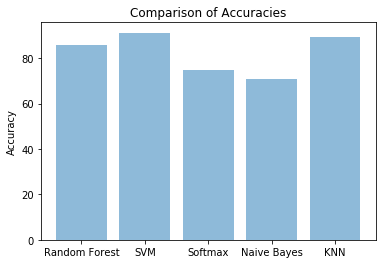

In [19]:
plt.bar(y_pos, a, align = 'center', alpha = 0.5)
plt.xticks(y_pos, models)
plt.ylabel('Accuracy')
plt.title('Comparison of Accuracies')
plt.show()